## About Dataset:

Objective:
The objective of this project was to be able to predict if a customer would stop using the telecom company's services or not(Churn)

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

Customers who left within the last month – the column is called Churn

Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

Demographic info about customers – gender, age range, and if they have partners and dependents

In [1]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [2]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [134]:
#So now, we have confirmed that there are no missing values, so we can proceed

In [6]:
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

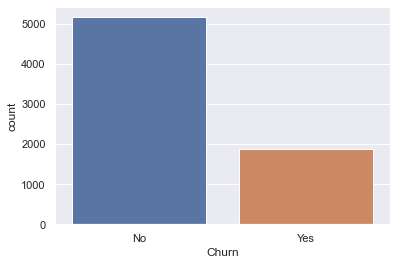

In [8]:
sns.countplot(data=df, x='Churn')

<AxesSubplot:xlabel='gender', ylabel='count'>

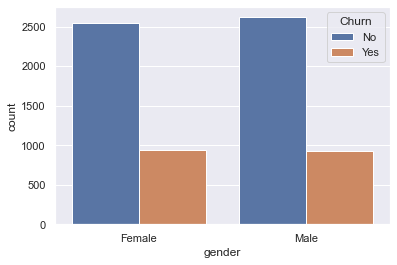

In [101]:
sns.countplot(data=df, x='gender', hue='Churn')

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

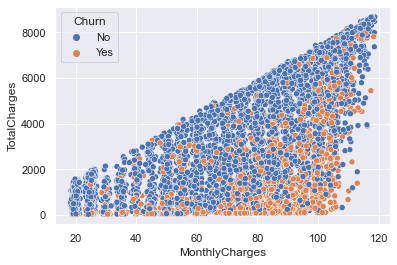

In [103]:
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Churn')

In [15]:
#The 'customerID' column is not needed for prediction, so we can just drop the column
df = df.drop(['customerID'], axis=1)

In [16]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [21]:
df.describe(include='all')

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7032,7032.000000,7032,7032,7032.000000,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032.000000,7032.000000,7032
unique,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,NaN,2
top,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,3549,NaN,3639,4933,NaN,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,NaN,NaN,5163
mean,NaN,0.162400,NaN,NaN,32.421786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.798208,2283.300441,NaN
std,NaN,0.368844,NaN,NaN,24.545260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.085974,2266.771362,NaN
min,NaN,0.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,NaN
25%,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.587500,401.450000,NaN
50%,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1397.475000,NaN
75%,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.862500,3794.737500,NaN


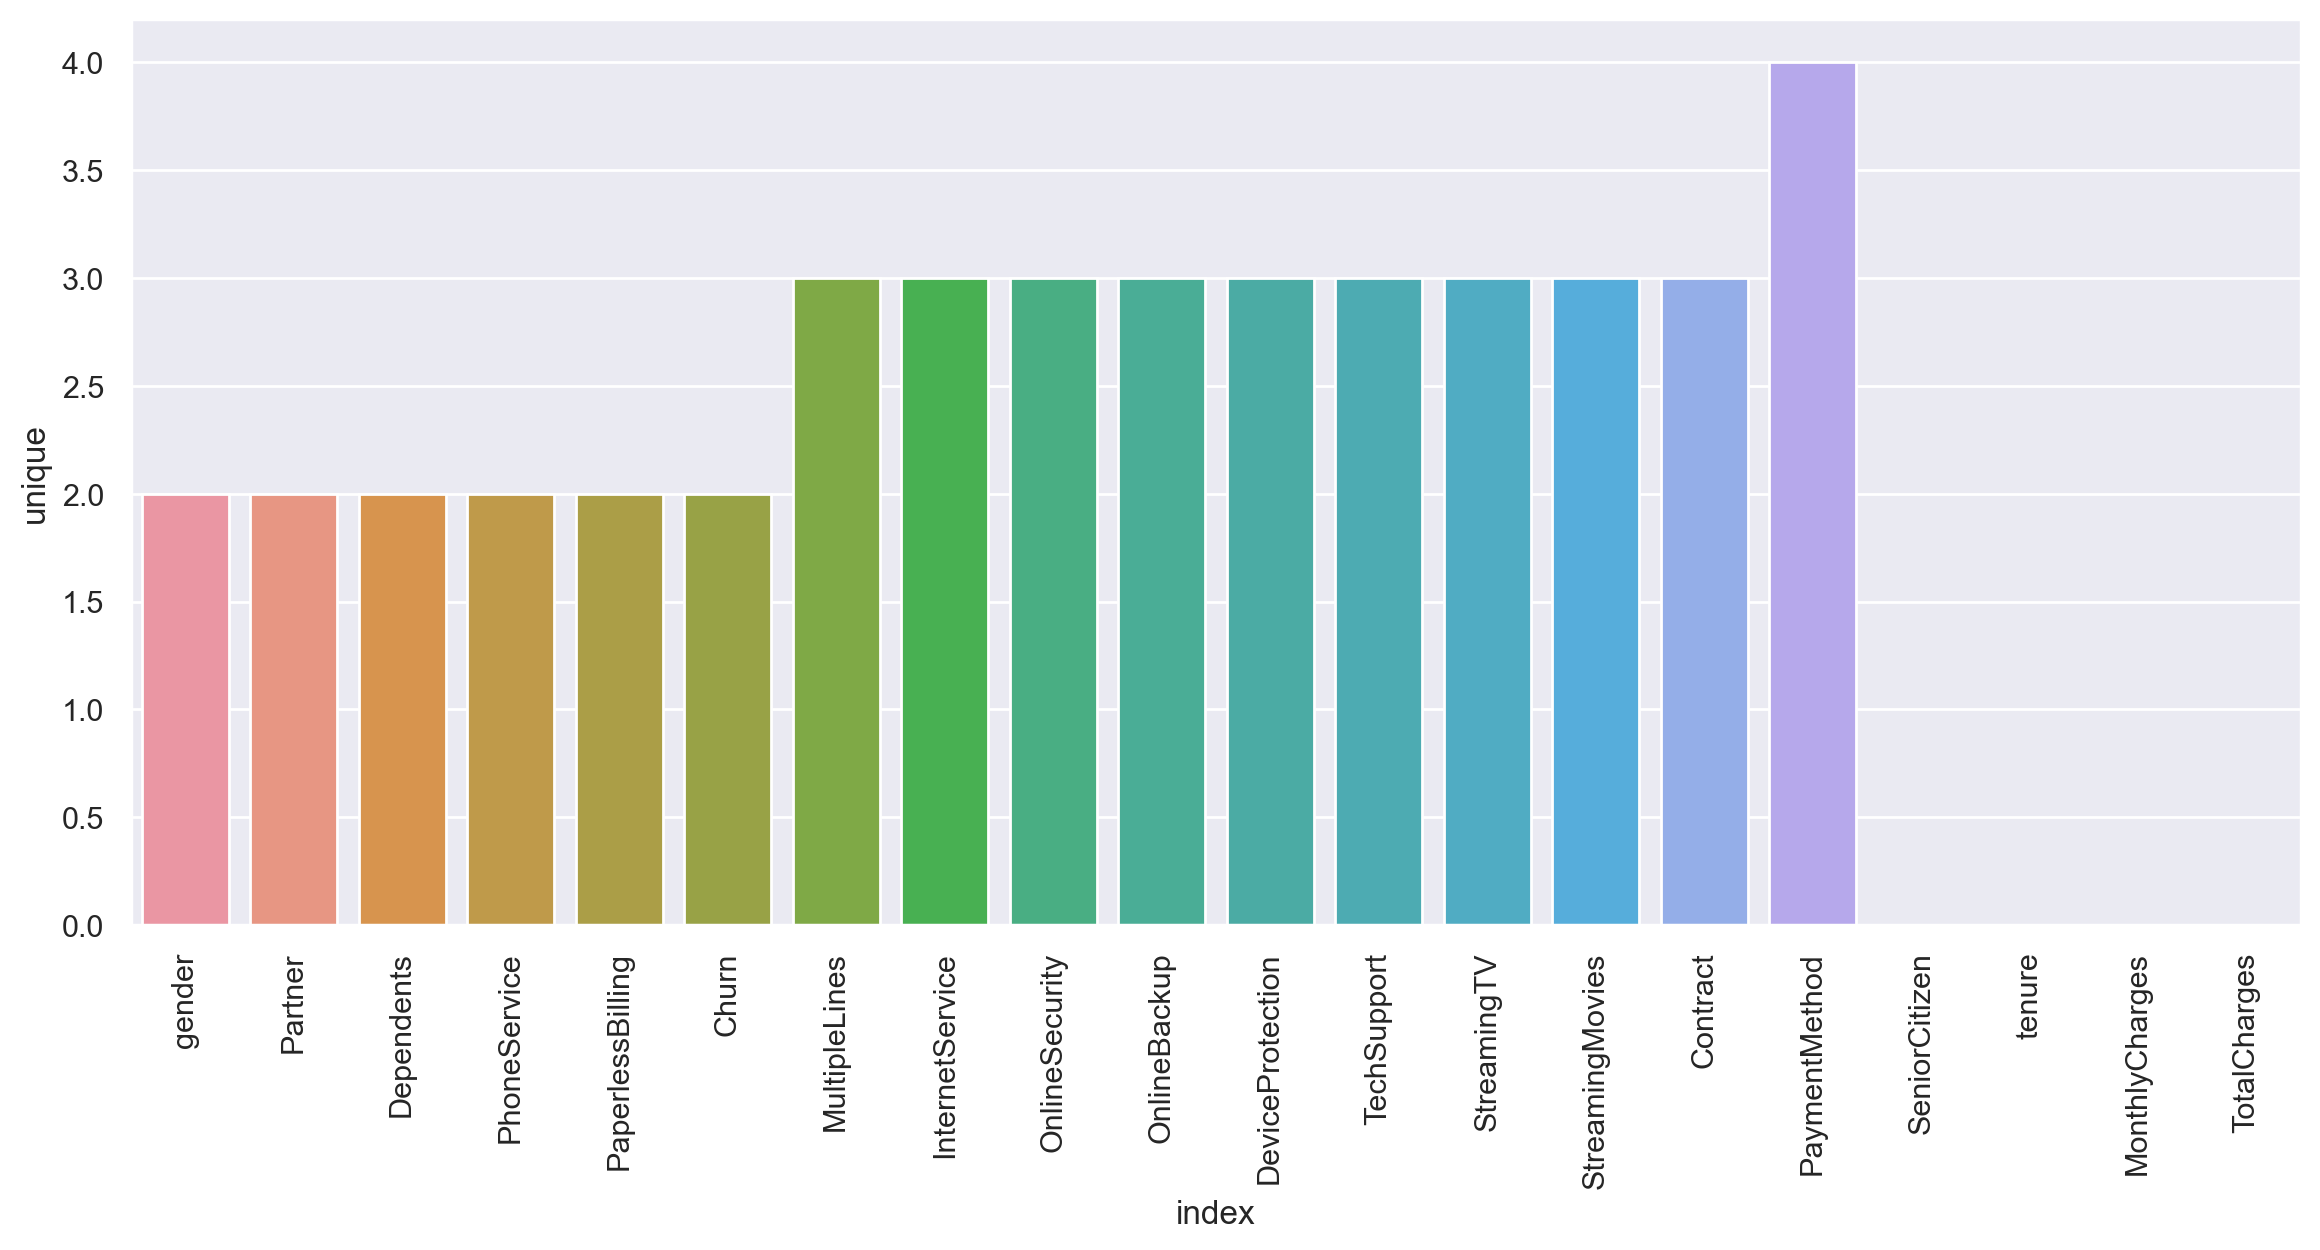

In [22]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=df.describe(include='all').transpose().reset_index().sort_values('unique'),x='index',y='unique')
plt.xticks(rotation=90);

## Train | Test Split

In [26]:
X = df.drop('Churn',axis=1)

In [27]:
#We will create dummy variables for the categorical features in our dataset and to prevent repition, we will make drop_first=True
X = pd.get_dummies(X,drop_first=True)

In [30]:
y = df['Churn']

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [37]:
scaler = StandardScaler()

In [38]:
scaled_X_train = scaler.fit_transform(X_train)

In [39]:
scaled_X_test = scaler.transform(X_test)

In [41]:
len(X_train)

4922

## Modelling and Grid Search CV

We're going to be creating several classification alogorithms using KNN, SVM, DecisionTrees, Random Trees, AdaBoosting as well as Gradient Boosting. We would then perform GridSearchCV on each of these models and using the performance metrics, detect the one that gives us the best performance on our dataset

In [42]:
from sklearn.model_selection import GridSearchCV

## KNN

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
help(KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors._classification:

class KNeighborsClassifier(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.ClassifierMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'} or callable, default='uniform'
 |      Weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neighbors of

In [45]:
knn_param_grid = {'n_neighbors': [1, 5, 10, 15], 'algorithm': ['auto', 'kd_tree', 'ball_tree']}

In [46]:
knn = KNeighborsClassifier()

In [47]:
knn_grid = GridSearchCV(knn, param_grid=knn_param_grid)

In [48]:
knn_grid.fit(scaled_X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'kd_tree', 'ball_tree'],
                         'n_neighbors': [1, 5, 10, 15]})

In [49]:
knn_grid.best_params_

{'algorithm': 'kd_tree', 'n_neighbors': 10}

In [50]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [53]:
knn_preds = knn_grid.predict(scaled_X_test)

In [54]:
print(classification_report(y_test, knn_preds))

              precision    recall  f1-score   support

          No       0.83      0.89      0.86      1580
         Yes       0.59      0.45      0.51       530

    accuracy                           0.78      2110
   macro avg       0.71      0.67      0.69      2110
weighted avg       0.77      0.78      0.77      2110



In [55]:
confusion_matrix(y_test, knn_preds)

array([[1412,  168],
       [ 289,  241]], dtype=int64)

## Support Vector Machines (SVM)

In [56]:
from sklearn.svm import SVC

In [57]:
svm_param_grid = {'C': [0.01,0.1,1,5,10,100,1000], 'gamma': ['auto', 'scale']}

In [60]:
svc = SVC(class_weight='balanced')
svm_grid = GridSearchCV(svc, param_grid=svm_param_grid)

In [61]:
svm_grid.fit(scaled_X_train, y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.01, 0.1, 1, 5, 10, 100, 1000],
                         'gamma': ['auto', 'scale']})

In [62]:
svm_grid.best_params_

{'C': 1, 'gamma': 'auto'}

In [63]:
svm_preds = svm_grid.predict(scaled_X_test)

In [64]:
print(classification_report(y_test, svm_preds))

              precision    recall  f1-score   support

          No       0.90      0.73      0.80      1580
         Yes       0.48      0.76      0.59       530

    accuracy                           0.74      2110
   macro avg       0.69      0.74      0.70      2110
weighted avg       0.80      0.74      0.75      2110



In [65]:
confusion_matrix(y_test, knn_preds)

array([[1412,  168],
       [ 289,  241]], dtype=int64)

## Decision Tree Classifier

In [66]:
from sklearn.tree import DecisionTreeClassifier

In [67]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best random split.
 |  
 |  max_d

In [108]:
dec_model = DecisionTreeClassifier()

In [109]:
dec_param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [None, 2, 3, 4]}

In [110]:
dec_grid = GridSearchCV(dec_model, dec_param_grid)

In [111]:
dec_grid.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 4]})

In [112]:
dec_grid.best_params_

{'criterion': 'entropy', 'max_depth': 4}

In [114]:
dec_preds = dec_grid.predict(X_test)

In [115]:
print(classification_report(y_test, dec_preds))

              precision    recall  f1-score   support

          No       0.81      0.95      0.87      1580
         Yes       0.69      0.35      0.46       530

    accuracy                           0.80      2110
   macro avg       0.75      0.65      0.67      2110
weighted avg       0.78      0.80      0.77      2110



## Random Forest Classifier

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
n_estimators=[64,100,128,200]
max_features= [2,3,4]
bootstrap = [True,False]
oob_score = [True,False]

In [76]:
rfc_param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap,
             'oob_score':oob_score}  

In [77]:
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid=rfc_param_grid)

In [78]:
rfc_grid.fit(X_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 411, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn(some_fits_failed_message, FitFailedWarning)
C:\User

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [79]:
rfc_grid.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 128, 'oob_score': True}

In [80]:
rfc_preds = rfc_grid.predict(X_test)

In [81]:
print(classification_report(y_test, rfc_preds))

              precision    recall  f1-score   support

          No       0.84      0.90      0.87      1580
         Yes       0.62      0.49      0.55       530

    accuracy                           0.80      2110
   macro avg       0.73      0.70      0.71      2110
weighted avg       0.79      0.80      0.79      2110



In [82]:
confusion_matrix(y_test, rfc_preds)

array([[1423,  157],
       [ 270,  260]], dtype=int64)

## AdaBoost and Gradient Boost

In [83]:
from sklearn.ensemble import AdaBoostClassifier

In [85]:
ada_param_grid = {'n_estimators': [1,5,10,20,40,100,200], 'learning_rate': [0.01, 0.1, 1.0, 2.0]}

In [86]:
ada_model = AdaBoostClassifier()
ada_grid = GridSearchCV(ada_model,ada_param_grid)

In [87]:
ada_grid.fit(X_train, y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1.0, 2.0],
                         'n_estimators': [1, 5, 10, 20, 40, 100, 200]})

In [88]:
ada_grid.best_params_

{'learning_rate': 1.0, 'n_estimators': 40}

In [90]:
ada_preds = ada_grid.predict(X_test)

In [91]:
print(classification_report(y_test, ada_preds))

              precision    recall  f1-score   support

          No       0.86      0.89      0.87      1580
         Yes       0.64      0.55      0.59       530

    accuracy                           0.81      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.80      0.81      0.80      2110



In [127]:
#We can check the importance of each feature used in the split for the model.

In [124]:
ada_grid.best_estimator_.feature_importances_

array([0.025, 0.175, 0.15 , 0.225, 0.   , 0.   , 0.   , 0.05 , 0.   ,
       0.025, 0.075, 0.   , 0.025, 0.025, 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.025, 0.   , 0.05 , 0.   , 0.025, 0.025, 0.05 , 0.025,
       0.   , 0.025, 0.   ])

In [128]:
#We can use the below syntax to check the index with the highest value(highest importance)
ada_grid.best_estimator_.feature_importances_.argmax()

3

In [126]:
X.columns[3]

'TotalCharges'

In [129]:
ada_feats = pd.DataFrame(index=X.columns, data = ada_grid.best_estimator_.feature_importances_, columns=['Importances'] )

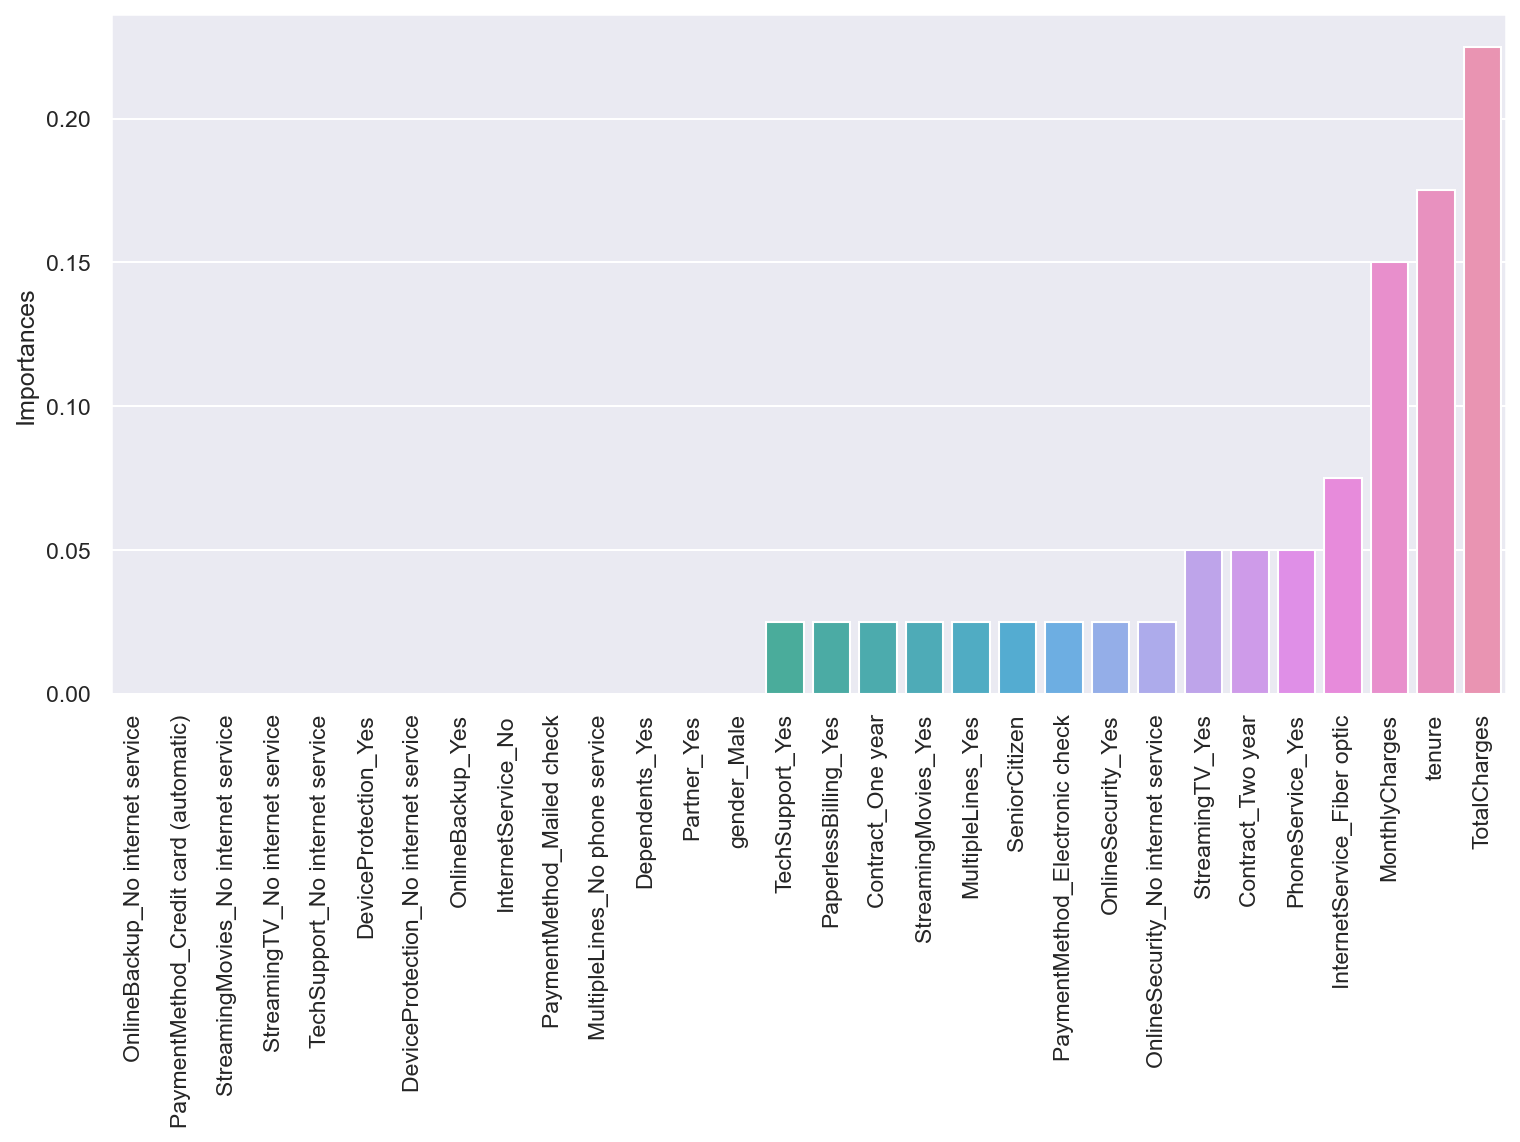

In [131]:
plt.figure(figsize=(12,6), dpi=150)
sns.barplot(data=ada_feats.sort_values('Importances'), x = ada_feats.sort_values('Importances').index, y = 'Importances')
plt.xticks(rotation=90);

In [92]:
from sklearn.ensemble import GradientBoostingClassifier

In [93]:
grad_param_grid = {'n_estimators': [1,5,10,20,50,100,200], 'learning_rate': [0.01, 0.1, 1.0, 2.0], 'max_depth': [2,3,4,5]}

In [94]:
grad_model = GradientBoostingClassifier()
grad_grid = GridSearchCV(grad_model, grad_param_grid)

In [95]:
grad_grid.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1.0, 2.0],
                         'max_depth': [2, 3, 4, 5],
                         'n_estimators': [1, 5, 10, 20, 50, 100, 200]})

In [96]:
grad_grid.best_params_

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}

In [98]:
grad_preds = grad_grid.predict(X_test)

In [99]:
print(classification_report(y_test, grad_preds))

              precision    recall  f1-score   support

          No       0.85      0.91      0.88      1580
         Yes       0.66      0.51      0.58       530

    accuracy                           0.81      2110
   macro avg       0.75      0.71      0.73      2110
weighted avg       0.80      0.81      0.80      2110



In [116]:
grad_grid.best_estimator_.feature_importances_

array([1.04306593e-02, 2.99752689e-01, 2.66059973e-02, 6.38402110e-02,
       0.00000000e+00, 0.00000000e+00, 6.69134957e-04, 1.40966589e-03,
       1.48946861e-03, 3.44486558e-03, 2.12523265e-01, 4.24397588e-03,
       1.83584319e-03, 6.87090076e-03, 3.88586755e-03, 0.00000000e+00,
       9.40289993e-03, 0.00000000e+00, 4.41818450e-03, 1.27125915e-02,
       2.76547840e-03, 1.26257063e-02, 1.23648681e-02, 2.10939811e-03,
       8.22219396e-02, 1.17353727e-01, 1.22458373e-02, 2.07979809e-03,
       9.24017324e-02, 2.95294190e-04])

In [119]:
grad_grid.best_estimator_.feature_importances_.argmax()

1

In [120]:
X.columns[1]

'tenure'

In [132]:
grad_feats = pd.DataFrame(index=X.columns, data = grad_grid.best_estimator_.feature_importances_, columns=['Importances'] )

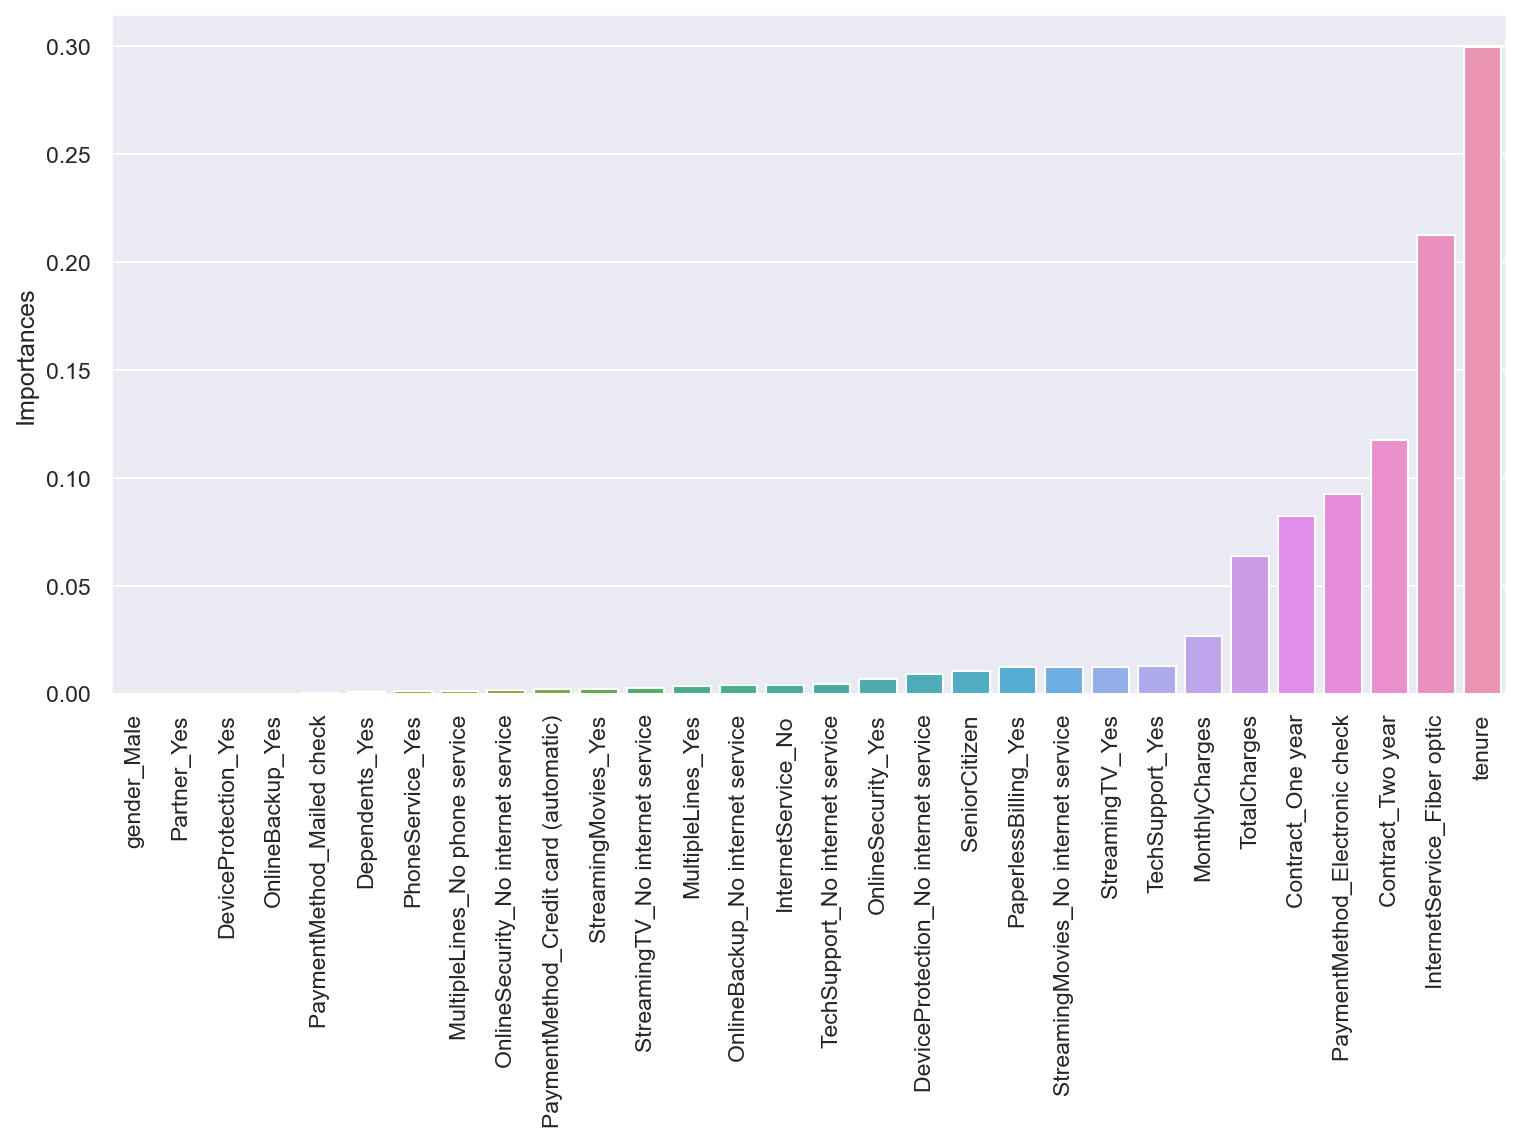

In [133]:
plt.figure(figsize=(12,6), dpi=150)
sns.barplot(data=grad_feats.sort_values('Importances'), x=grad_feats.sort_values('Importances').index, y='Importances')
plt.xticks(rotation=90);

## Conclusion

It would be noticed that out of all the machine learning algorithms used, the two boosting techniques(Gradient and AdaBoost) gave the best results for this particular dataset(although not exactly the same results).

Also, from the feature importance results of the two best models, it could be deduced that Total Charges as well as the tenure a customer has spent using the company's services are strong predictors in deducing if the customer would churn or not.

Finally, it was observed that the general performance of each model (including the two highest) was still quite low, this was because of the huge imbalance between the two target classes which greatly affected the accuracy, recall as well as the prediction for each model.